## 1 散点图（Scatter plot）
散点图是用于研究两个变量之间关系的经典的和基本的图表。 如果数据中有多个组，则可能需要以不同颜色可视化每个组。 在 matplotlib 中，您可以使用 plt.scatterplot（） 方便地执行此操作。

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.3
0.11.0


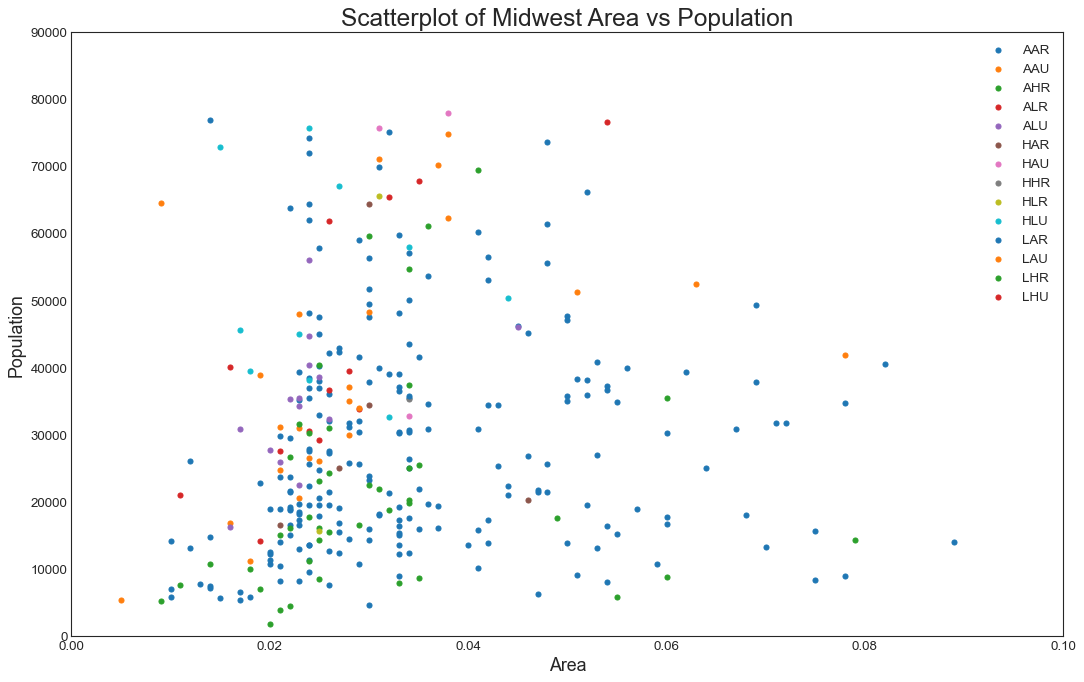

In [2]:
# Import dataset
midwest = pd.read_csv("datasets/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category==category, :],
                s=20, cmap=colors[i], label=str(category))
    # "c=" 修改为 "cmap="，Python数据之道 备注

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    